In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class="tocSkip"></a>

# Coefficient of determination $R^2$ <a class="tocSkip"></a>
## A critical investigation <a class="tocSkip"></a>

### Niels Bohr Institute <a class="tocSkip"></a>

# Introduction 

The so-called _coefficient of determination_ for a data sample 

$$\{(x_i,y_i)\,|\,i=1,\ldots,N\ x\in X, y\in Y\}\quad,$$ 

and a function $f:X\rightarrow Y$ is defined as  

$$
R^2\equiv 1 - \frac{\sum_{i=1}^{N} r_i^2}{(N-1) s_y^2} 
= 1 - \frac{\sum_{i=1}^{N} \left(y_i - f(x_i)\right)^2}{\sum_{i=1}^{N} \left(y_i-\overline{y}\right)^2}\quad.$$ 

In the fraction, the numerator is the sum of square _residuals_ $r_i=(y_i-f(x_i))$ and the denominator is $(N-1)$ times the _sample variance_ of $y$.  

The statistic $R^2$, where by _statistic_ we mean function of the data, is typically used as a _quality of fit_ parameter in linear, least-squares regression.   Here, we will investigate this claim. 

## Nomenclature 

Here, we will adopt a nomenclature often seen in the literature (e.g., [L.Wasserman](https://www.stat.cmu.edu/~larry/all-of-statistics/)): 

- Capital letters - $X,Y,\ldots$ - are random variables.  A random variable can be thought of as a _distribution_.
- Lower case letters - $x,y,\ldots$ - are concrete samples of random variables $X,Y,\ldots$.
- A _statistics_ $T$ is a function of data.  

- The _expectation value_ - $\mathbb{E}(X)$ - is what we expect to get from a random variable, and similarly the expectation value of a statistics - $\mathbb{E}(T(X))$ is what we expect to get from that statistic evaluated on the random variable.
  - For a concrete sample $x$, an estimator of $\mathbb{E}(X)$ is the sample average 
    $$\overline{x}=\sum_{i=1}^{N} x_i\quad.$$ 
- The _variance_ - $\mathbb{V}(X)$ - of a random variable is the expected variation of a random variable.  Similarly, the variance of a statistics - $\mathbb{V}(T(X))$ is the variation of that statistic evaluated on the random variable. 
  - For a concrete sample $x$, an estimator of $\mathbb{V}(X)$ is the sample variance 
    $$s_x^2=\frac{1}{N-\delta}\sum_{i=1}^{N} \left(x_i - \overline{x}\right)^2\quad,$$ 
    which is _unbiased_ if $\delta=1$. 
    
- The _covariance_ - $\mathrm{Cov}(X,Y)$ - of pairs of random variables $X,Y$ is the expected simultaneous
  variation of the two random variables. 
  - For a concrete sample $x,y$ and estimator of $\mathrm{Cov}(X,Y)$ is the sample covariance 
  
    $$s_{xy}^2 = \frac{1}{N-\delta}\sum_{i=1}^{N}\left(x_i-\overline{x}\right)\left(y_i-\overline{y}\right)\quad,$$
    
    which is _unbiased_ if $\delta=1$.  Note $s_{xx}^2 = s_{x}^2$ - the covariance of $X$ with it self is the variance of $X$, and $s_{yx}^2 = s_{xy}^2$ - the covariance is symmetric with respect to the order of variables. 
    

- For a random variable $X$ distributed according to some distribution $\mathcal{D}$, we write 

  $$X\sim\mathcal{D}\quad.$$ 
  
  In particular 
  
  - For a _normal_ (or bell, Gaussian) random variable we write 
  
    $$X\sim\mathcal{N}[\mu,\sigma]\quad,$$ 
    
    where the _probability density function_ is given by 
    
    $$f_{\mathcal{N}}(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}\quad.$$ 
    
  - For a _uniform_ (or flat) random variable we write 
  
    $$X\sim\mathcal{U}[a,b]\quad,$$ 
    
    with the probability density function 
    
    $$f_{\mathcal{U}}(x;a,b) = \frac{1}{b-a}\quad.$$

# Linear, least-squares regression 

Given the data sample 

$$\{(x_i,y_i)\,|\,i=1,\ldots,N\}\quad,$$

we would like to find the straight line 

$$f(x;a,b) = a + bx\quad,$$ 

which comes closest to the data.   That is, we adopt the model 

$$ Y_i = a + bX_i + \mathrm{P}_i\quad,$$ 

where the $\mathrm{P}_i$ is a random variable for which we assume that the expectation value and variance are given by 

$$
\begin{aligned}
\mathbb{E}(\mathrm{P}_i) &= 0 &\forall i&=1,\ldots,N\\
\mathbb{V}(\mathrm{P}_i) &= \sigma^2 &\forall i&=1,\ldots,N\quad.\\
\end{aligned}
$$

The random variable $\mathrm{P}_i$ is thus the "noise" parameter added to each $Y_i$ value, and we assume that the standard deviation $\sigma$ is _same_ for all data points in our sample. 

The goal of linear, least-squares regression is then to determine $a,b$ such that 

$$C^2 = \sum_{i=1}^{N} \mathrm{P}_i^2\quad,$$ 

is _minimal_.  That is, we want to _estimate_ $a,b$ such that $C^2$ is as small as possible.  It is easily shown (see e.g., [L.Wasserman](https://www.stat.cmu.edu/~larry/all-of-statistics/)) that these _estimators_ are given by 

$$
\begin{aligned}
  \widehat{b}
  &= \frac{\sum_{i=1}^{N} (X_i-\overline{X})(Y_i-\overline{Y})}{\sum_{i=1}^{N}\left(X_i-\overline{X}\right)^2}
  = \frac{\mathrm{Cov}(X,Y)}{\mathbb{V}(X)}\\
  \widehat{a}
  &= \overline{Y}-\widehat{b}\overline{X}\\
  \widehat{\mathrm{P}}_i 
  &= Y_i - \widehat{a} - \widehat{b}X_i\\
  \widehat{\sigma^2} 
  &= \frac{1}{N-2}\sum_{i=1}^{N}\widehat{\mathrm{P}}^2_i
\end{aligned}
$$

Note that the $-2$ in the denominator of $\widehat{\sigma}$ is _not_ a mistake - we have used _2_ degrees of freedom to estimate $\overline{X}$ and $\overline{Y}$.  Note, the estimator of $\mathrm{P}_i$ is simply the residual $r_i$ with $f(x)=\widehat{a}+\widehat{b}x$. 

## Example - generated data 

As an example, we will generate some random $(x_i,y_i)$ where 

$$
\begin{aligned}
X &\sim \mathcal{U}[0,1]\\ 
Y &\sim b + aX + \mathcal{N}[0,\sigma]\quad.
\end{aligned}
$$
We choose $a=1,b=1$ and $\sigma=0.1$ and pick $N=20$ samples. 

In [2]:
from matplotlib.pyplot import plot, xlabel, ylabel, legend
from numpy.random import seed, uniform, normal 

seed(123)
N = 20
a = 1 
b = 1
s = 0.1 
x = uniform(size=N)
y = a + b*x + normal(0,s,size=N)

We calculate the estimators $\widehat{a},\widehat{b},$ and $\widehat{\sigma}$ 

In [3]:
from numpy import cov, mean, var, vstack, sum

sxy  = cov(x,y,bias=1) 
bhat = sxy[0,1] / sxy[0,0]
ahat = mean(y) - bhat * mean(x)
phat = y - ahat - bhat * x
shat = sum(phat**2)/(len(x)-2)
print('Estimates vs Input:\n'
      f' b  = {bhat:.3f}\tvs\t{b}\n'
      f' a  = {ahat:.3f}\tvs\t{a}\n'
      f' σ  = {shat:.3f}\tvs\t{s*s:.3f}')

Estimates vs Input:
 b  = 0.991	vs	1
 a  = 0.986	vs	1
 σ  = 0.013	vs	0.010


Note, we could have used the function `scipy.stats.linregress`, but we chose to do the calculation by hand to illustrate these. 

We draw our sample, the input line, as well as our "fitted" line 

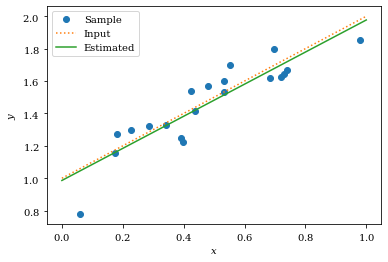

In [4]:
from numpy import linspace

domain = linspace(0,1,100)
plot(x,     y,               'o',label='Sample')
plot(domain,a   +b   *domain,':',label='Input')
plot(domain,ahat+bhat*domain,'-',label='Estimated')
xlabel('$x$')
ylabel('$y$')
legend();

We see that our fitted line comes relatively close to the input line. 

## Correlation coefficient 

The correlation coefficient $r$ (sometimes called Pearson's $r$) is defined as 

$$r\equiv\frac{\mathrm{Cov}(X,Y)}{\sqrt{\mathbb{V}(X)\mathbb{V}(Y)}}\quad,$$ 

and is a measure of how _correlated_ the random variables $X$ and $Y$ are.  The sample estimator of the correlation coefficient is then 

$$\widehat{r} = \frac{s_{xy}^2}{\sqrt{s_x^2 s_y^2}}\quad.$$ 

For a sample as above, it is easy to calculate $\widehat{r}$.  For example for the generated data above, we get 

In [5]:
from numpy import sqrt
rhat = sxy[0,1] / sqrt(sxy[0,0]*sxy[1,1])
print(f'Correlation coefficient: {rhat:.3}')

Correlation coefficient: 0.899


It is relatively straight forward to see that $r\in[-1,1]$, and the usual interpretation is that a large positive value means the two random variables are _correlated_ while a large negative value indicates _anti-correlation_.  A numerical small value on the other hand, indicates little or no correlation. 

# $R^2$ for linear, least-squares regression

Let us return to the coefficient of determination $R^2$ for a linear, least-squares regression.     With the above, and identifying the residuals as the estimate $\widehat{\mathrm{P}}$, we find

<!-- $$
\begin{align*}
R^2 &= 1 - \frac{\sum_{i=1}^{N} \left(Y_i - \widehat{a} - \widehat{b}X_i\right)^2}{\mathbb{V}(Y)}\\
    &= 1 - \frac{\sum_{i=1}^{N} \left(Y_i - \overline{Y} + \widehat{b}\overline{X} - \widehat{b}X_i\right)^2}{
             \mathbb{V}(Y)}\\
    &= 1 - \frac{\sum_{i=1}^{N} \left(Y_i - \overline{Y} - \widehat{b}(X_i-\overline{X})\right)^2}{
             \mathbb{V}(Y)}\\
    &= 1 - \frac{\sum_{i=1}^{N} \left((Y_i - \overline{Y})^2 + (X_i-\overline{X})\widehat{b}^2 
                                      -2(X_i-\overline{X})(Y_i-\overline{Y})\widehat{b}\right)}{
                                      \mathbb{V}(Y)}\\
    &= 1 - \frac{\mathbb{V}(Y)+\mathbb{V}(X)\widehat{b}^2-2\mathrm{Cov}(X,Y)\widehat{b}}{\mathbb{V}(Y)}\\
    &= 1 - 1 - \frac{\mathbb{V}(X)\frac{\mathrm{Cov}^2(X,Y)}{\mathbb{V}^2(X)}-2\mathrm{Cov}(X,Y)\frac{\mathrm{Cov}(X,Y)}{\mathbb{V}(X)}}{\mathbb{V}(Y)}\\
    &= -\frac{\mathrm{Cov}^2(X,Y) - 2\mathrm{Cov}^2(X,Y)}{\mathbb{V}(X)\mathbb{V}(Y)}\\
    &= \frac{\mathrm{Cov}^2(X,Y)}{\mathbb{V}(X)\mathbb{V}(Y)}\\
    &= r^2\quad.
\end{align*}
$$ -->

In [6]:
from sympy import symbols, Sum, S, IndexedBase, Eq
N, i = symbols('N i',integer=True,positive=True)
# i = Idx('i',(1,N))
X = IndexedBase('X')
Y = IndexedBase('Y')
EX, EY, VX, VY, CXY = symbols(r'\mathbb{E}(X) \mathbb{E}(Y) '
                              r'\mathbb{V}(X) \mathbb{V}(Y) '
                              r'\mathrm{Cov}(XY)',real=True)
bhat = symbols('bhat',real=True)
ahat = EY-EX*bhat
P    = Y[i]-ahat-bhat*X[i]
R2   = 1 - Sum(P**2,(i,1,N))/(N*VY)
Eq(symbols('R')**2,R2)

Eq(R**2, 1 - Sum((\mathbb{E}(X)*bhat - \mathbb{E}(Y) - bhat*X[i] + Y[i])**2, (i, 1, N))/(N*\mathbb{V}(Y)))

We define $\Delta_{X_i}=X_i-\mathbb{E}(X)$ and $\Delta_{Y_i}=Y_i-\mathbb{E}(Y)$, and substitute that into the above equation 

In [7]:
from sympy import rcollect
DX = IndexedBase('Delta_X')
DY = IndexedBase('Delta_Y')
R2 = (1-Sum(rcollect(P,bhat).subs({X[i]-EX:DX[i],Y[i]-EY:DY[i]})**2,(i,1,N))/(N*VY)).expand()
Eq(symbols('R')**2,R2)

Eq(R**2, 1 - Sum(bhat**2*Delta_X[i]**2, (i, 1, N))/(N*\mathbb{V}(Y)) - Sum(-2*bhat*Delta_X[i]*Delta_Y[i], (i, 1, N))/(N*\mathbb{V}(Y)) - Sum(Delta_Y[i]**2, (i, 1, N))/(N*\mathbb{V}(Y)))

We recognize that 

$$
\begin{aligned}
  \sum_{i=1}^{N} \Delta_{X_i}^2 &= N\mathbb{V}(X)\\
  \sum_{i=1}^{N} \Delta_{Y_i}^2 &= N\mathbb{V}(Y)\\
  \sum_{i=1}^{N} \Delta_{X_i}\Delta_{Y_i} &= N\mathrm{Cov}(X,Y)\quad, 
\end{aligned}
$$

which we can substitute into the above 

In [8]:
R2_ = R2.subs({Sum(DY[i]**2,(i,1,N)):N*VY,
               Sum(bhat**2*DX[i]**2,(i,1,N)):bhat**2*N*VX,
               Sum(-2*bhat*DX[i]*DY[i],(i,1,N)):-2*bhat*N*CXY})
Eq(symbols('R')**2,R2_)

Eq(R**2, -\mathbb{V}(X)*bhat**2/\mathbb{V}(Y) + 2*\mathrm{Cov}(XY)*bhat/\mathbb{V}(Y))

Inserting $\widehat{b} = \mathrm{Cov}(X,Y)/\mathbb{V}(X)$, we find 

In [9]:
Eq(symbols('R')**2,R2_.subs(bhat, CXY/VX))

Eq(R**2, \mathrm{Cov}(XY)**2/(\mathbb{V}(X)*\mathbb{V}(Y)))

and we recognize the square of the correlation coefficient so that 

$$R^2 = r^2\quad.$$

Thus, we find that the coefficient of determination is _identical_ to the square of the correlation coefficient for a linear, least-squares regression.   This is significant in that it shows us that $R^2\in[0,1]$ since $r\in[-1,1]$ for linear, least-squares regression. 

# Standard errors on $\widehat{a}$ and $\widehat{b}$ 

By _standard errors_ we mean the square root if the variance of the expected values of $a$ and $b$.   If we assume, as we did in the example above, that $\mathrm{P}_i$ is normal distributed with a mean of 0 fixed width $\sigma$ - that is 

$$\mathrm{P}_i \sim \mathcal{N}[0,\sigma]\quad,$$ 

then it can be shown that the estimators of the standard errors ($\mathrm{se}$) are given by 

$$
\begin{aligned}
  \widehat{\mathrm{se}}(\widehat{b}) 
  &= \frac{\widehat{\sigma}}{s_{X}\sqrt{N}}
  = \sqrt{\frac{1}{N-2}\frac{\sum_{i=1}^{N} Y_i - \widehat{a}-\widehat{b}X_i}{\sum_{i=1}^{N}\left(X_i-\overline{X}\right)^2}}\\
  \widehat{\mathrm{se}}(\widehat{a}) 
  &= \frac{\widehat{\sigma}}{s_{X}\sqrt{N}}\sqrt{\frac{\sum_{i=1}^{N}X_i^2}{N}}
  = \widehat{\mathrm{se}}(\widehat{b})\sqrt{\overline{X^2}}\quad.
  \end{aligned}
  $$

# $p$-value of $\widehat{b}$

To reject hypothesis $H_0$ that $b=0$ in favor of the hypothesis $H_1$ that $b\ne 0$, we can perform a Student's $t$-test.  The test statistic in that case becomes 

$$t = \frac{\widehat{b}}{\widehat{\mathrm{se}}(\widehat{b})} = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}\quad,$$ 

and thus the correlation coefficient shows up again.  We should then evaluate the probability of this $t$ value _or higher_ from the $t$-distribution. 

## Example - generated data 

Continuing from the example above, we evaluate the $p$-value 

In [10]:
from scipy.stats.distributions import t as tdist
N      = 20
t      = rhat * sqrt(N-2) / sqrt(1-rhat**2)
pvalue = tdist.sf(t,N-2)*2
print(f'p-value of regression: {pvalue*100:g}%')

p-value of regression: 7.02797e-06%


Thus, we cannot reject $H_0$ at any meaningful significance. 

# The significance of $R^2$ 

As we saw above, the $R^2$ statistic reduces to the correlation coefficient for linear, least-squares regressions.  For other types of regression (or "fit") there is no such clear connection, and the value and meaning of the $R^2$ statistic becomes less obvious.  On the other hand, for linear, least-squares regression, we learn very little about the probability of our determined parameters from $R^2$.  

The conventional interpretation of the coefficient of determination $R^2$, is that 

- $R^2$ close to one signifies a good fit. 
- $R^2$ close to zero signifies a bad fit. 

Behind these statements is the notion of _explained_ variance.  

## Explained Variance 

In the above way of understanding the sum of square residuals 

$$\sum_{i=1}^{N} \left(Y_i - \widehat{a} - \widehat{b}X_i\right)^2\quad,$$ 

and the sum of actual squares 

$$\sum_{i=1}^{N} \left(Y_i - \overline{Y}\right)^2\quad,$$ 

are measures of the model.  The ratio 

$$\frac{\sum_{i=1}^{N} \left(Y_i - \widehat{a} - \widehat{b}X_i\right)^2}{\sum_{i=1}^{N} \left(Y_i - \overline{Y}\right)^2}\quad,$$ 

is then seen as the ratio of _unexplained_ variation, and hence 

$$R^2 = 1 - \frac{\sum_{i=1}^{N} \left(Y_i - \widehat{a} - \widehat{b}X_i\right)^2}{\sum_{i=1}^{N} \left(Y_i - \overline{Y}\right)^2}\quad,$$ 

is seen as the fraction _explained_ variance.  

Leaving a side the notion of _explanation_ is probably not a well defined term in statistics, it also becomes obvious that $R^2$ does not really express any sort of quality measure.  We shall illustrate this by way of examples. 

## Example - $X,Y$ are uncorrelated 

Let us build a data sample where 

$$\begin{aligned}
X&\sim \mathcal{U}[0,1]\\
Y&\sim \mathcal{N}[\mu,\sigma]\quad,
\end{aligned}
$$ 

where we take $\mu=1,\sigma=0.1$.  Thus, we expect $s_y = 0.1$. 

In [11]:
from scipy.stats import linregress

seed(123)

N = 20
x = uniform(size=20)
y = normal(1,0.1,size=20)
b,a,r,p,e = linregress(x,y)

plot(x,y,'o',label='Data')
plot(domain,a+b*domain,'-',label='Regression')

print(f'R-square: {r**2}')

R-square: 0.0003841790421298514


This low value of $R^2$ would suggest that the model is rather poor at describing the data, which clearly is not the case: $f(x)=a+bx$ is exactly the right model when $b=0$.  If we take the estimate $\widehat{\sigma}$ to be an estimate of the standard deviation of each point, then we can evaluate the standard $\chi^2$ 

$$\chi^2 = \sum_{i=1}^{N} \frac{(y_i - f(x_i))^2}{\delta^2_i} = \frac{1}{\widehat{\sigma^2}} \sum_{i=1}^{N} (y_i - \widehat{a}-\widehat{b}x_i)^2\quad,$$ 

and determine the probability of the fit with $N-2$ degrees of freedom

In [12]:
from scipy.stats import chi2 as spchi2 

chi2 = sum((y-a-b*x)**2)/e**2 
pchi2 = spchi2.sf(chi2,N-2)
print(f'χ^2/ν: {chi2:.1f}/{N-2} = {chi2/(N-2):.2f} with {pchi2*100:.1f}% probability')

χ^2/ν: 18.6/18 = 1.03 with 41.7% probability


The $\chi^2$ probability we find is quite significant, and we would say our model is reasonable. 

## Example - $X,Y$ scattered 

In this example we will pick $X,Y$ uniformly over $[0,1]$.  We will do so a number of times, and in each go evaluate $R^2$

In [13]:
from numpy import ones, arange, cumsum

R2 = -1 * ones(1000)
for i in range(len(R2)):
    x = uniform(size=20)
    y = uniform(size=20)
    b,a,r,p,e = linregress(x,y)
    R2[i] = r**2 

from matplotlib.pyplot import hist, yscale, axes

ax = axes()
h, *_ = ax.hist(R2,linspace(0,1,31),label='Distribution of $R^2$',density=True)
ax.set_yscale('log')

tax = ax.twinx()
tax.plot(arange(1/60,1,1/30),cumsum(h)/30,color='C1')
tax.axhline(.95,ls='--');

Again, we see that $R^2$ often get a low value which would be interpreted as a bad fit, but in 5% of the cases we find $R^2>0.2$.

## Example - increasing sample size 

Let us take the second example above - i.e., $X\sim\mathcal{U}$ and $Y\sim\mathcal{N}$, but this time we will increase the sample size.  Here, we will also evaluate the $\chi^2$ probability but we take the standard deviation of $Y$ to be our estimate of the (constant) uncertainty $\delta$ in $Y$. 

In [14]:
from numpy import geomspace 

seed(256)

N = geomspace(2,1000,30,dtype=int)

R2 = -1 * ones(len(N))
Pchi2 = 0 * ones(len(N))
for i, n in enumerate(N):
    x = uniform(size=n)
    y = normal(1,0.1,size=n)
    b,a,r,p,e = linregress(x,y)
    R2[i] = r**2
    
    chi2 = sum((y-a-b*x)**2) / y.var()
    p    = spchi2.sf(chi2,n-2)
    Pchi2[i] = p
    
ax = axes()
ax.plot(N,R2,'o')
ax.set_xlabel('$N$')
ax.set_ylabel('$R^2$',color='C0')
ax.set_xscale('log')

tax = ax.twinx()
tax.plot(N,Pchi2*100,color='C2')
tax.set_ylabel(r'$P(\chi^2,\nu)$ (%)',color='C2');

We see that $R^2$ generally decreases with the sample size, which isn't all that surprising.  Only at very low $N$ does $R^2$ have any significant value that would lead us to conclude we had a good fit.  The $\chi^2$ probability of the fit, however, approaches $50\%$ in the high limit, and we would characterize the fit as "good". 

# $R^2$ and $\chi^2$

We saw above that 

$$R^2 
= 1 - \frac{\sum_{i=1}^{N}\left(y_i-f(x_i)\right)^2}{\sum_{i=1}^{N}(y_i-\overline{y})^2}
= 1 - \frac{\sum_{i=1}^{N}r_i^2}{(N-1)s_y^2}\quad,$$

where $s_y^2$ is the $y$ sample variance, and $r_i$ are the residuals with respect to the function (or estimate of expectation) $f$.  On the other hand, we have that 

$$\chi^2 
= \sum_{i=1}^{N}\frac{\left(y_i-f(x_i)\right)^2}{\delta_i^2}
= \sum_{i=1}^{N}\frac{r_i^2}{\delta_i^2}\quad.
$$ 

If we assume that $\delta_i^2 = s_y^2$ for all $i$ - that is, the uncertainty in $y_i$ is the _same_ for all points and that it is given by the variance in $y$, then we find that that 

$$R^2 = 1-\frac{1}{N-1}\chi^2\quad.$$


However, this implies that in _general_ (not just of a linear, least-squares regression) that $R^2\in(-\infty,1]$ since $\chi^2\in[0,\infty)$.  For a linear, least-squares regression, though we find that $\chi^2\in[0,N-1]$. 

## Example - Possible equivalence of $R^2$ and $\chi^2$ 

Let us return to our [first example](#Example---generated-data).  That is we select 

$$
\begin{aligned}
X &\sim \mathcal{U}[0,1]\\ 
Y &\sim b + aX + \mathcal{N}[0,\sigma]\quad.
\end{aligned}
$$
We choose $a=1,b=1$ and $\sigma=0.1$ and pick a variable number of samples. For each set, we perform a linear, least-squares regression and evaluate $R^2$ and $\chi^2$, where we take the standard deviation in $y$ to be the uncertainty on $y_i$. 

In [15]:
a = 1 
b = 1
s = 0.1 

N = geomspace(2,1000,30,dtype=int)

R2   = -1 * ones(len(N))
chi2 = 0 * ones(len(N))
for i, n in enumerate(N):
    x           = uniform(size=n)
    y           = a + b*x + normal(0,s,size=n)
    bh,ah,r,p,e = linregress(x,y)
    R2[i]       = r**2
    res         = y-ah-bh*x
    s2          = y.var() # 1/(n-2)*sum(res**2)
    chi2[i]     = sum(res**2) / s2

We plot $R^2$ versus $1-\chi^2/(N-1)$

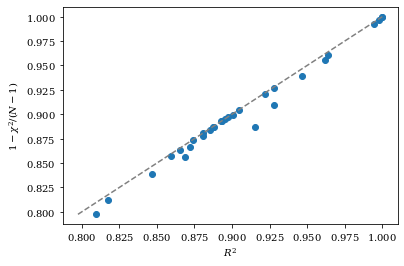

In [16]:
y = 1 - chi2/(N-1)
plot(R2,y,'o')
ident = min(R2.min(),y.min()), max(R2.max(),y.max())
plot(ident,ident,'--',color='gray')
xlabel(r'$R^2$')
ylabel(r'$1-\chi^2/(N-1)$');

We see that the postulated relation between $R^2$ and $\chi^2$ holds relatively well. 

However the assumption 

$$\delta_i^2 = s_y^2\quad,$$ 

is obviously an _overestimate_ of the uncertainties. In fact, we _have_ an estimate of the (common) uncertainty on all $y_i$ values from the linear, least-squares regression given by 

$$
\begin{aligned}
  r_i = \widehat{\mathrm{P}}_i 
  &= Y_i - \widehat{a} - \widehat{b}X_i\\
  \delta_i^2 = \widehat{\sigma^2} 
  &= \frac{1}{N-2}\sum_{i=1}^{N}\widehat{\mathrm{P}}^2_i\quad.
\end{aligned}
$$

For large $N$ (order $1\,000$) $r_i$ is normal distributed and in that case, one can show that $\widehat{\sigma^2}$ is the maximum likelihood estimator of $\sigma^2$.  

## Example - Better uncertainty estimate 

By way of example, we will show that the assumption $\delta_i^2=s_y^2$ is an over estimate of the uncertainties, and that $\delta_i^2=\widehat{\sigma^2}$ is a better estimate.  We will generate a single data sample as above, and perform the linear, least-squares regression 

In [17]:
a = 1 
b = 1
s = 0.05
N = 100
x           = uniform(size=N)
y           = a + b*x + normal(0,s,size=N)
bh,ah,r,p,e = linregress(x,y)
res         = y-ah-bh*x
s2          = 1/(n-2)*sum(res**2)
chi2[i]     = sum(res**2) / s2 

Let us plot the data with the two different estimates of the $y$ uncertainties 

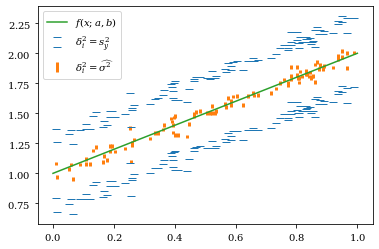

In [18]:
from matplotlib.pyplot import errorbar 
from numpy import full_like

errorbar(x,y,full_like(x,y.std()),fmt='none',
         color='k',
         elinewidth=0,linewidth=0,capsize=4,ecolor='C0',
         label=r'$\delta_i^2=s_y^2$')
errorbar(x,y,full_like(x,sqrt(s2)),
         color='none',ecolor='C1',elinewidth=3,
         fmt='none',label=r'$\delta_i^2=\widehat{\sigma^2}$')
xp = linspace(0,1,10)
plot(xp,a+b*xp,'-',color='C2',label=r'$f(x;a,b)$')
legend();

We see that the uncertainties given by the estimator $\widehat{\sigma^2}$ are clearly much more reasonable than the estimate given by the standard deviation in $y$.  

If we insert our estimate of the uncertainty into $\chi^2$, we find that 

$$
\begin{aligned}
\chi^2 &= \sum_{i=1}^{N}\frac{\left(y_i - f(x_i)\right)^2}{\delta_i^2}\\
       &= \frac{1}{\widehat{\sigma^2}}\sum_{i=1}^{N} r_i^2\\
       &= \frac{N-2}{\sum_{i=1}^{N} r_i^2}\sum_{i=1}^{N} r_i^2\\
       &= N-2
\end{aligned}
$$ 

Given that $\mathbb{E}(\chi^2)=\nu$ where $\nu$ is the number of degrees of freedom, and in this case we have $\nu=N-2$ (two degrees of freedom removed by estimators $\widehat{a}$ and $\widehat{b}$), we see that in the linear, least-squares regression that $\widehat{\sigma^2}$ estimates the uncertainties so that the fit is "best possible".  

# Best possible fit and $\chi^2$ 

Here, we will dive a little into what we mean by a "good fit".  Off hand, it a _qualitative_ statement which is not really what we would like to use, so let us consider how we can _quantify_ the statement.  

We can of course plot our data (_with_ uncertainties) and our fitted function as we did in the previous section, and _visually_ verify (or not) that the function seems to describe the data.  Although this approach certainly has its merits (see for example [this note on Anscombe's Quartet](https://cholmcc.gitlab.io/nbi-python/statistics/#Anscombe)) it does not _quantify_ (put a number to it) the goodness of fit. 

A better approach is to consider the distribution of our _objective function_.  For least-squares regression (whether it is linear or not), the objective function is typically $\chi^2$ for a given number of degrees of freedom $\nu$.  The underlying assumption is that the _dependent variable_ ($y$) is normally distributed around the expectation $f(x)$ 

$$y_i \sim \mathcal{N}[f(x_i),\delta_i]\quad.$$ 

Given that assumption, one can deduce the probability density function of $\chi^2$ as 

$$f(x=\chi^2;\nu) = \frac{1}{2^{\nu/2}\Gamma (\nu/2)} x^{\nu/2-1}e^{-x/2}\quad x\in\mathbb{R}^+\quad,$$ 

where $\Gamma$ is the "gamma function" (generalized factorial).   It is trivial to show that the expectation value and variance of this distribution are 

$$\begin{aligned}
\mathbb{E}(\chi^2|\nu) &= \nu & 
\mathbb{V}(\chi^2|\nu) &= 2\nu
\end{aligned}\quad.
$$ 

We can use this to quantify what we mean by goodness-of-fit. 

> If $\chi^2=\nu$, or equivalently that the _reduced_ $\chi^2$ 
>
> $$\chi^2_\nu = \chi^2/\nu = 1\quad,$$
>
> then we have a _perfect_ fit. 

Note, the above is a _rule of thumb_ and really only applies in the limit of large $\nu$ where the assumption 
$y_i\sim\mathcal{N}[f(x_i),\delta_i]$ is justified. 

To further strengthen our intuition about this, let us consider the _probability_ of $\chi^2_\nu=1$ - or rather the probability of finding a smaller or larger value of $\chi^2$ given $\nu$. 

We can evaluate, using the probability density function $f$, what the probability of getting a $\chi^2$ which is either smaller or larger than the found value.  Quantitative we can evaluate the probability 

$$P(x<\chi^2|\nu) = F(\chi^2;\nu) = \int_0^{\chi^2}\mathrm{d}x\,f(x;\nu)\quad,$$ 

where $F$ is the _cumulative distribution function_.

Let us evaluate $P(x<\chi^2=\nu|\nu)$ for different values of $\nu$

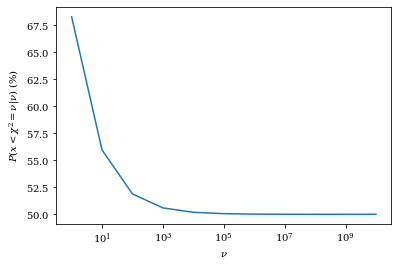

In [19]:
from matplotlib.pyplot import xscale
from numpy import logspace
nu = logspace(0,10,11)

plot(nu,spchi2.cdf(nu,nu)*100)
ylabel(r'$P(x<\chi^2=\nu|\nu)$ (%)')
xlabel(r'$\nu$')
xscale('log');

We see that, for large $\nu$, that the probabilities of a smaller or larger $\chi^2$ approaches $50\%$, or 

> If it is equally likely, for a given $\nu$, to find a smaller or larger $\chi^2$ value, then we have a perfect fit. 

The intuition is quite clear: given that $y_i\sim\mathcal{N}[f(x_i),\delta_i]$, if we repeat the measurements, and our model $f$ is correct, then it should be equally likely to get a smaller or larger $\chi^2$.  

We can turn the argument around, and ask which $\chi^2_\nu$ do we need for $P(x < \chi^2=\nu|\nu)=50\%$ for some range of $\nu$

In [20]:
from matplotlib.pyplot import axvline

plot(nu,spchi2.isf(.5,nu)/nu)
xlabel(r'$\nu$')
ylabel(r'$\chi^2/\nu$ (where $P(x<\chi^2=\nu|\nu)=50\%$)')
axvline(100,ls='--',color='gray')
xscale('log')

We see that for large $\nu$ ($>100$ or so) that $\chi^2_\nu=1$ implies that it is equally likely to obtain a smaller or larger value if we were to repeat the measurements.  For small $\nu$ we see that _smaller_ $\chi^2_\nu$ has the same implication down to $\chi^2_\nu\approx1/2$ for $\nu=1$.  Thus, 

> For a small number of degrees of freedom ($\nu<100$) a reduced $\chi^2$ value _smaller_ than 1 (but larger than $1/2$) implies a good fit.  

It is clear why this is so.  For small $\nu$ the assumption $y_i\sim\mathcal{N}(f(x_i),\delta_i)$ is not justified and we can only obtain a good fit if the data points are not too widely scattered around the expectation $f(x)$. 

# Conclusions 

Above, we have seen that the coefficient of determination $R^2$ simply reduces to the square correlation coefficient $r^2$ in the case of linear, least-squares regression.  Thus, the statistics $R^2$ provides _less_ information (loss of sign) than the correlation coefficient.  By way of counter-example, we have also seen that the coefficient of determination is in no way a test statistics of goodness-of-fit - not for linear, least-squares regression or any other kind of fit.  Large values of $R^2$ simply indicates that the independent and dependent variables are (anti-)correlated, while small values indicate little correlation. 

On the other hand, we have seen that a $\chi^2$ test for goodness-of-fit provides a rigorous method.  We have seen, that in the case of linear, least-squares regression we find $\chi^2_\nu=1$ corresponding to the expectation of the test.  We have also built an intuition around the value of the reduced $\chi^2$. 

However, as with all things mathematical, it is important to keep the assumptions foremost in mind when applying such methods.  We have seen that for small $\nu$ a value of $\chi^2_\nu=1$ does not correspond to the intuition of a "good fit".  Indeed, in those cases we would classify smaller values a indications of a good fit. 

This underscores a number of key points 

- The coefficient of determination $R^2$ is _not_ a test of goodness-of-fit 
- Rather than quoting $R^2$ one should quote the correlation coefficient $r$ 
- When performing least-squares regressions (or fits) one should evaluate the $\chi^2$, and evaluate the probability of getting a larger value than the found value.  That, is the proper goodness-of-fit criteria. 